In [9]:
import numpy as np
import pandas as pd
import nltk
import re
import os
from nltk.corpus import stopwords
#from nltk.stem import
import matplotlib.pyplot as plt
import seaborn as sb
import spacy

In [10]:
pd.set_option("display.max_colwidth",200)

In [11]:
#to read a single text file 
file=open('bbc_sports_articles/003.txt',mode='rt',encoding='utf-8')
text=file.read()
text
file.close()
import spacy

In [13]:
#to read multiple text files we use a for loop
#we have differetnt names of 100 of text files too tedious hence we use
#list dir function of OS library
#apply for loop on these names
#append content of the files into a empty list
import os
file_names=os.listdir('bbc_sports_articles')

In [14]:
#print first 10 file names
file_names[:10]

['001.txt',
 '002.txt',
 '003.txt',
 '004.txt',
 '005.txt',
 '006.txt',
 '007.txt',
 '008.txt',
 '009.txt',
 '010.txt']

In [15]:
#to read content of the files
#create a empty list
#use a for loop to read contents
articles=[]

for f in file_names:
    file1=open('bbc_sports_articles/'+f,mode='rt',encoding='utf-8')
    text=file1.read()
    file1.close()
    articles.append(text)

In [16]:
articles[300]

'Scrum-half Williams rejoins Bath\n\nBath have signed their former scrum-half Andy Williams on a short-term deal from the Neath-Swansea Ospreys.\n\nWales international Williams, whose contract with the Welsh region was due to expire in June, has agreed a contract until the end of the season. With Martyn Wood\'s injury likely to keep him out until February, Bath need experienced back-up to Nick Walshe. Said Williams: "When this opportunity presented itself, I did not really have to think twice about it." Williams, capped by Wales against Romania in 2003, should figure in the match squad for Monday\'s Zurich Premiership match at Sale Sharks. He lost his Ospreys starting place to New Zealander Jason Spice and has fallen further behind in the pecking order. The Welsh region has two outstanding young No 9 prospects in Richie Rees and Rhodri Wells. Bath director of rugby Jack Rowell, though, believes Williams fits the bill perfectly. "He has been playing regular Heineken Cup and Celtic Leagu

In [17]:
#issue of backslash and newline charaters are present
#clean the text
#there are numbers, punctuations and special characrters

In [50]:
clean_articles1=[]
for i in articles:
    clean_articles1.append(i.replace("\n"," ").replace("\'"," "))
    clean_articles1=[re.sub("[^a-zA-Z]"," ",x)for x in clean_articles1]
    clean_articles1=[' '.join([w for w in x.split() if len(w)>1])for x in clean_articles1]
    clean_articles1=[x.lower() for x in clean_articles1]
    

In [38]:
  clean_articles1[300]

'scrum half williams rejoins bath bath have signed their former scrum half andy williams on short term deal from the neath swansea ospreys wales international williams whose contract with the welsh region was due to expire in june has agreed contract until the end of the season with martyn wood injury likely to keep him out until february bath need experienced back up to nick walshe said williams when this opportunity presented itself did not really have to think twice about it williams capped by wales against romania in should figure in the match squad for monday zurich premiership match at sale sharks he lost his ospreys starting place to new zealander jason spice and has fallen further behind in the pecking order the welsh region has two outstanding young no prospects in richie rees and rhodri wells bath director of rugby jack rowell though believes williams fits the bill perfectly he has been playing regular heineken cup and celtic league rugby and he has great affection for bath r

In [41]:
#to find most frequent words in our data
def freq_words(x,terms=30):
    text=' '.join([text for text in x])
    #split text to words
    all_words=text.split()
    fdist=nltk.FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    #select top n most words
    d=words_df.nlargest(columns='count',n=terms)
    #plot the word counts
    plt.figure(figsize=(20,5))
    ax=sb.barplot(data=d,x='word',y='count')
    ax.set(ylabel='count')
    plt.show()

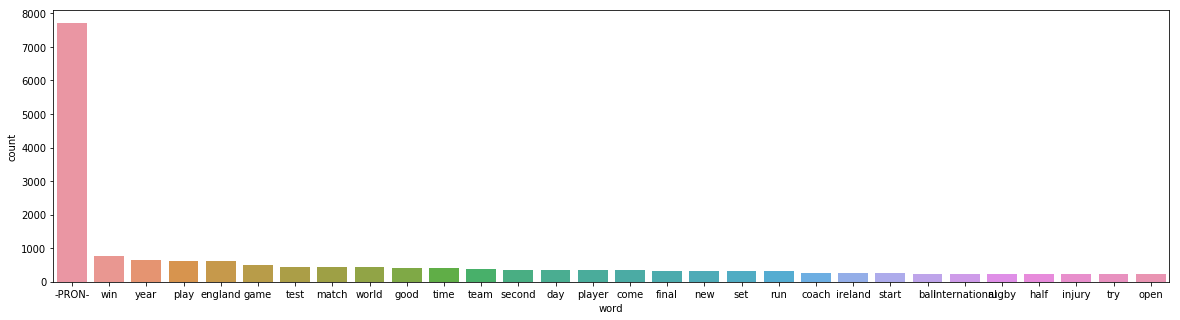

In [54]:
freq_words(clean_articles1)

In [22]:
nlp=spacy.load('en_core_web_sm')

In [64]:
#lemmatization
clean_articles1=[' '.join([token.lemma_ for token in nlp(x)]) for x in clean_articles1]

#removing stopwords
clean_articles1=[' '.join([w for w in x.split() if nlp.vocab[w].is_stop==False]) for x in clean_articles1]

clean_articles1=[re.sub('-pron-','',i) for i in clean_articles1]

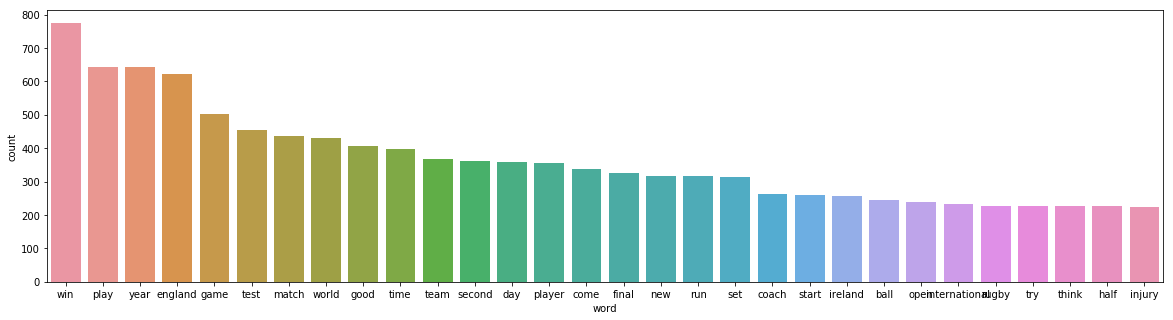

In [65]:
freq_words(clean_articles1)

In [63]:
clean_articles1

['claxton hunt major medal british hurdler sarah claxton confident win major medal month european indoor championships madrid year old smash british record hurdle twice season set new mark second win aaas title confident claxton race come long training think chance medal claxton win national hurdle title past year struggle translate -pron- domestic success international stage scotland bear athlete equal fifth fast time world year week birmingham grand prix claxton leave european medal favourite russian irina shevchenko trail sixth spot time claxton prepare campaign hurdle explain leap form previous season year old contest long jump colchester london focus attention claxton -pron- new training regime pay dividend european indoor place march',
 'sullivan run world sonia sullivan indicate like participate month world cross country championship st etienne athletics ireland hint year old cobh runner include official line event france march provincial team select saturday national santry off

In [67]:
#latent semantic analysis(LSA)
#rows-articles
#columns-with unique words of articles
#if m no of documents and total no of unique no words will be n then DTM will have m rows corresponding 
#to each and every documents and columns will be unique terms

In [68]:
#to get unique words of article
def get_words(x):
    text=' '.join(text for text in x)
    return set(text.split())

In [70]:
unique_words=get_words(clean_articles1)
len(unique_words)

7754

In [71]:
#values in the matirx are the tfid scores which tells the importance of the score

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(clean_articles1)
X.shape

(472, 7754)

In [78]:
X_df=pd.SparseDataFrame(X,columns=vectorizer.get_feature_names(),index=range(len(clean_articles)),default_fill_value=0)

In [81]:
#as most of the values are 0 no use of keeping such terms or terms
X_df.head()

,aaa,aaas,aac,aakash,aaron,ab,abandon,abate,abbott,abc,...,zinc,zipp,zoe,zondeki,zone,zornotza,ztl,zuluaga,zurich,zvonareva
0,0.0,0.096352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
#to reduce sparsity
vectorizer=TfidfVectorizer()
vectorizer=TfidfVectorizer(max_features=1000,min_df=5,max_df=0.9)
#min document frequency(min_df) means any word appearing less than 5 times is ingonred
#term occuring more than 90% of the documents will be ignored(max_df)
x=vectorizer.fit_transform(clean_articles1)

In [85]:
x.shape

(472, 1000)

In [86]:
#all documents must be represented by same size vectors
#here the size is number of vectors
#here it is 1000
#seggregate topics into 1000 different topics

In [87]:
#we will use SVD to reduce the dimensionality(1000 categories to k categories)
#will give three matirxs
#first matrix will be document topic matrix(contains vectors for every article)
#topic term matrix(vectors of those 1000 terms that were used to prepare the DTmatrix)
#topic vs topic matrix(wont be used for this analysis)
#

In [106]:
from sklearn.decomposition import TruncatedSVD
svd_model=TruncatedSVD(n_components=4,random_state=12,n_iter=1000)

In [107]:
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=1000,
       random_state=12, tol=0.0)

In [108]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
    
    print("Topic "+str(i)+": ")
    topics = []
    for t in sorted_terms:
        topics.append(t[0])
    
    print(topics)
    print('\n')

Topic 0: 
['katich', 'marshall', 'option', 'century', 'strike', 'birmingham', 'keeper', 'eighth', 'edinburgh', 'television', 'pitch', 'ready', 'tell', 'sport', 'offer', 'news', 'laporte', 'comment', 'replacement', 'inning', 'secs', 'pass', 'new', 'bring', 'distance', 'charge', 'spot', 'injury', 'return', 'mate', 'relay', 'ali', 'close', 'serve', 'begin', 'plan', 'lock', 'tuesday', 'target', 'matthew', 'middle', 'need', 'irish', 'inside', 'jacques', 'speak', 'northern', 'easterby', 'de', 'experience']


Topic 1: 
['century', 'marshall', 'katich', 'sport', 'news', 'serve', 'spot', 'edinburgh', 'speak', 'need', 'visit', 'matthew', 'action', 'secs', 'sotherton', 'wales', 'contest', 'bergamasco', 'noon', 'hickie', 'plan', 'contract', 'irish', 'sprint', 'holmes', 'afternoon', 'great', 'henson', 'sure', 'don', 'light', 'earn', 'new', 'champion', 'semi', 'crown', 'stand', 'haq', 'certain', 'chairman', 'high', 'middle', 'wilkinson', 'tourist', 'certainly', 'munster', 'return', 'know', 'mid', 'k

In [109]:
 svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=1000,
       random_state=12, tol=0.0)

In [110]:
lsa_topic_matrix=svd_model.transform(X)
lsa_topic_matrix.shape

(472, 4)